# Resultados de la tesis de análisis de eficiencia de la BMV con indicadores de noticias

La estrategia de trabajo comenzó con la adquisición de los valores
del Índice de Precios y Cotizaciones (IPC) de la Bolsa Mexicana de Valores (BMV), así como la obtención de noticias de las plataformas financieras de Bloomberg y la página de Investing, las cuales se sometieron a un proceso de limpieza y preprocesamiento, para los análisis subsecuentes. En segundo lugar, se realizó la estimación de la eficiencia del mercado mediante el exponente de Hurst, el cual se basa en la implementación de un análisis de tiempo y escala del exponente de Hurst local, lo que permitió visualizar la dinámica del mercado. Además, se estableció el procedimiento usado para la construcción de los indicadores mediante técnicas de procesamiento de lenguaje natural, logrando incorporar información no estructurada al estudio. En la primera fase, se llevó a cabo la modelación de tópicos, utilizando el contenido del cuerpo de las noticias. En la segunda etapa, se realizó un análisis de sentimiento en los títulos de las noticias.



# Índice de Precios y Cotizaciones

**El inicio de la recopilación de datos en esta investigación se centró en el Índice de Precios y Cotizaciones por ser el principal indicador del rendimiento de la Bolsa Mexicana de Valores (BMV).**

In [10]:
with open(path+'Serie_IPC_cierre'+'.pickle', "rb") as fp:
    ipc_cierre = pickle.load(fp)

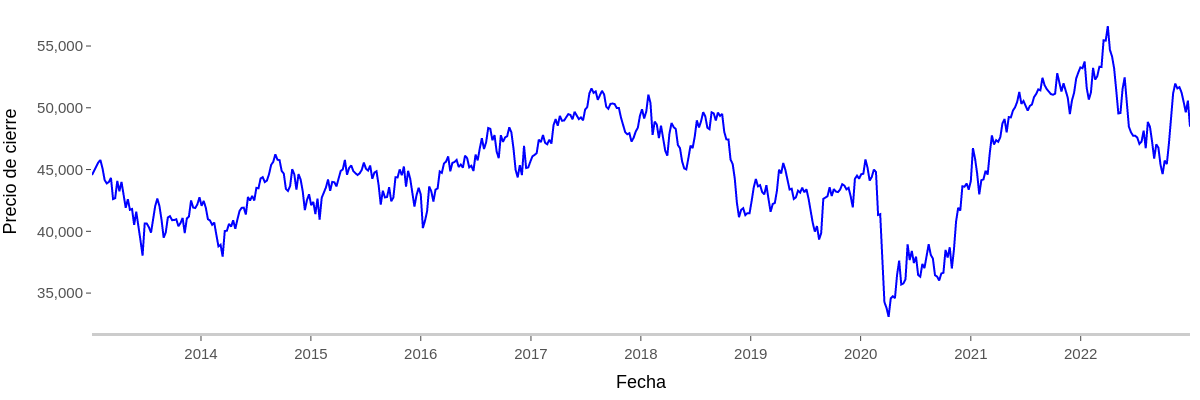

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = ipc_cierre.index,y = ipc_cierre.values, mode='lines',
        name='Precio de cierre',line=dict(color='blue', width=2)))
config_fig("Precio de cierre","Fecha")
fig.update_layout(width=1200,height=400)
fig.show(renderer="png")

**Después, se procedió a transformar la serie semanal de los valores de cierre del IPC al calcular los rendimientos, utilizando la fórmula de retornos logarítmicos**
$$y(t)= log(x_t)-log(x_{t-1})$$

In [13]:
with open(path+'Serie_IPC_return'+'.pickle', "rb") as fp:
    ipc_return = pickle.load(fp)

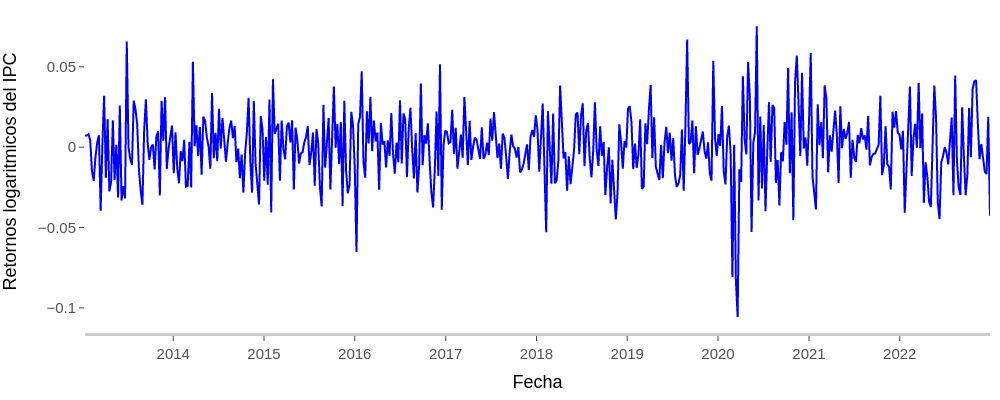

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = ipc_return.index,y = ipc_return.values, mode='lines',
        name='Retornos logaritmicos del IPC',line=dict(color='blue', width=2)))
config_fig("Retornos logaritmicos del IPC","Fecha")
fig.update_layout(width=1200,height=400)
fig.show(renderer="png")

# Exponentes de Hurst

**Se aplicó el algoritmo TS-LHE sobre la serie de retornos logarítmicos.**

1. **Definir los tamaños de la escala $(W_{s_{min}},\dots,W_{s_{max}})$ para calcular el TS-LHE. Estos tamaños definen la vecindad para analizar las correlaciones de la serie.**
2. **Calcular una serie extendida de la serie original definida como:**
    $$y_{Pad}(n)=\{y(L+1),\dots,y(2),y(1),y(2),\dots,y(N-1),y(N),y(N-1),\dots,y(N-L)\}$$
3. **Establecer una vecindad en la serie extendida sobre el primer punto de la serie original**
4. **Calcular el valor correspondiente hurst mediante el análisis del rango escalado** $\overline{\Big(\frac{R}{S}\Big)}$    
5. **Mover la vecindad a la siguiente muestra de la serie**
6. **Repetir los pasos 2 al 5 incrementando el valor de $W_s$ hasta alcanzar el valor máximo.**

In [16]:
with open(path+ "Matrix_hurst.pickle", "rb") as fp:
    H_matrix = pickle.load(fp)

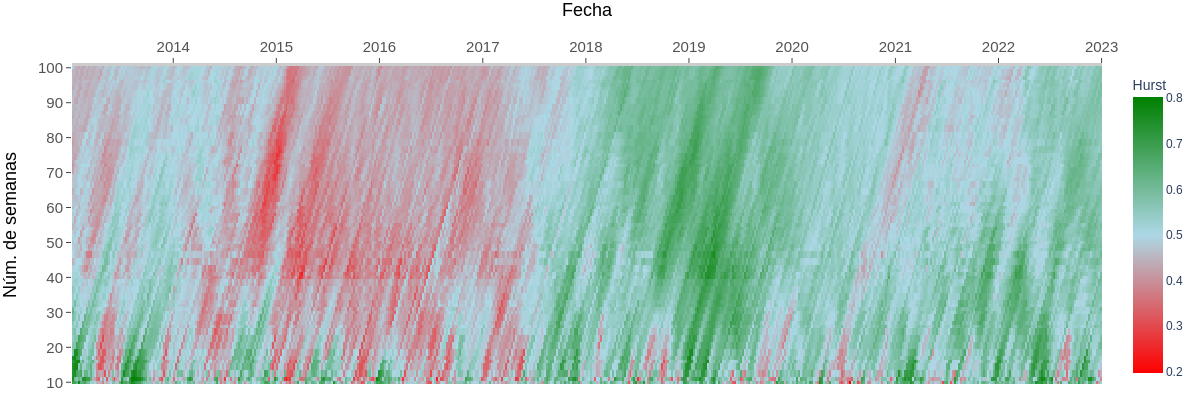

In [17]:
fig = px.imshow(H_matrix,x=ipc_return.index,origin='lower', #zmin=0, zmax=1,
                labels=dict(x="Fecha", y="Vecinos", color="Hurst"),
                y=list(np.arange(10,10+H_matrix.shape[0])),
                color_continuous_scale = ["red", "lightblue", "green"],
                color_continuous_midpoint = 0.5)

config_fig('Núm. de semanas','Fecha')
fig.update_xaxes(side="top")
fig.update_layout(width=1200,height=400)
fig.show(renderer="png")

# Indicadores de noticias

**Los indicadores de noticias se obtuvieron al unir los resultados de la modelación de tópicos y el análisis de sentimiento.**

- **En primer lugar, el texto preprocesado del cuerpo de las noticias se utilizó para aplicar el modelo de BERTopic. Los indicadores de cada tópico se caracterizaron con una serie de tiempo y una nube de palabras, de manera que, en el lado izquierdo de la gráfica del indicador se muestra la serie de tiempo del número de noticias semanales pertenecientes a cada tópico, mientras que en el lado derecho se muestran las 10 palabras más importantes de los documentos dentro del tópico basado en la representación c-TF-IDF.**

- **En segundo lugar, los títulos de las noticias se utilizaron para realizar un análisis de sentimiento con Pysentimento. Los indicadores de sentimiento se crearon contabilizando el número de títulos con una probabilidad mayor a 0.7, de exhibir polaridad positiva o negativa.**



## Noticias de Bloomberg

### Tópico 1

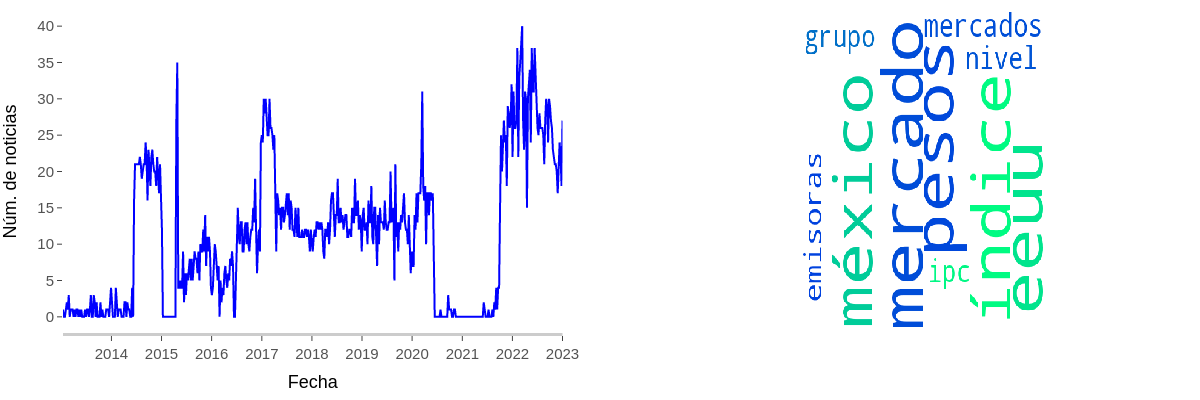

In [28]:
ax_topic = aux_topic[0].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==0)[0]].values,10)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 1',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Tópico 2

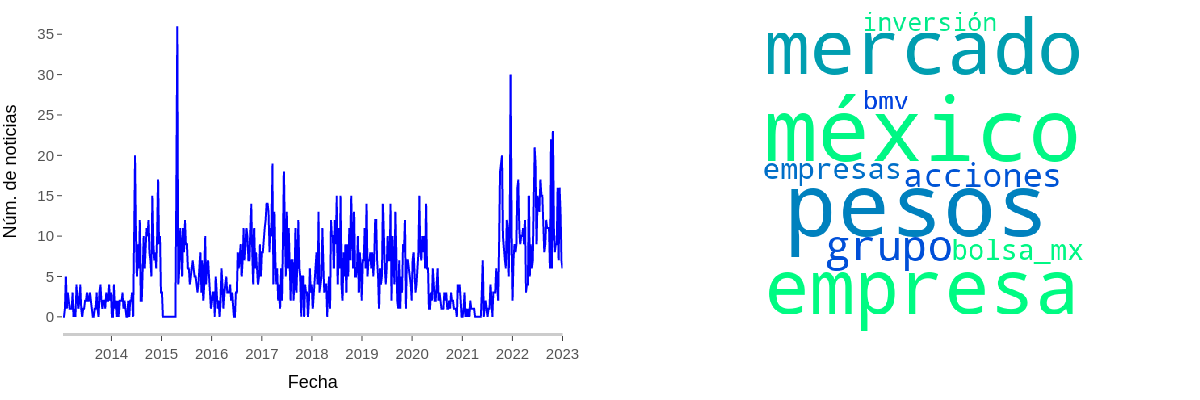

In [30]:
ax_topic = aux_topic[1].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==1)[0]].values,10)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 2',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Tópico 3

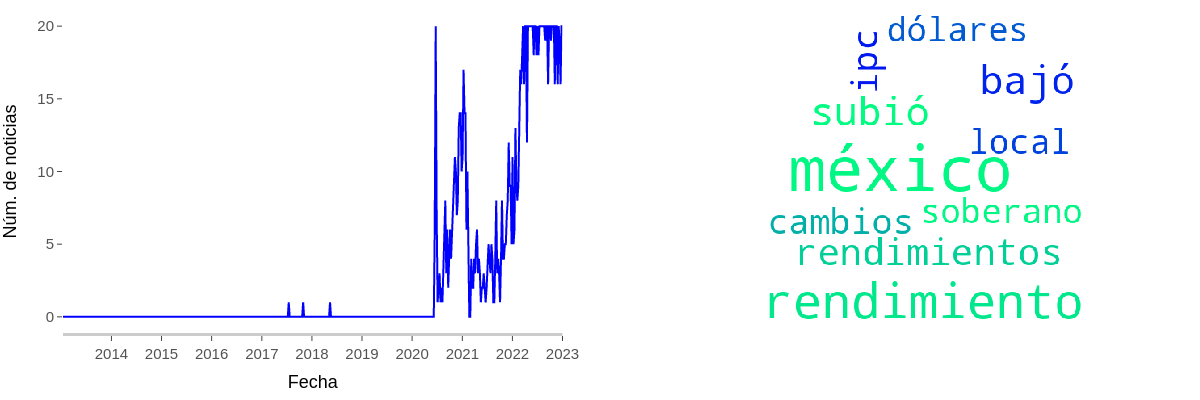

In [31]:
ax_topic = aux_topic[2].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==2)[0]].values,10)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 3',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Tópico 4

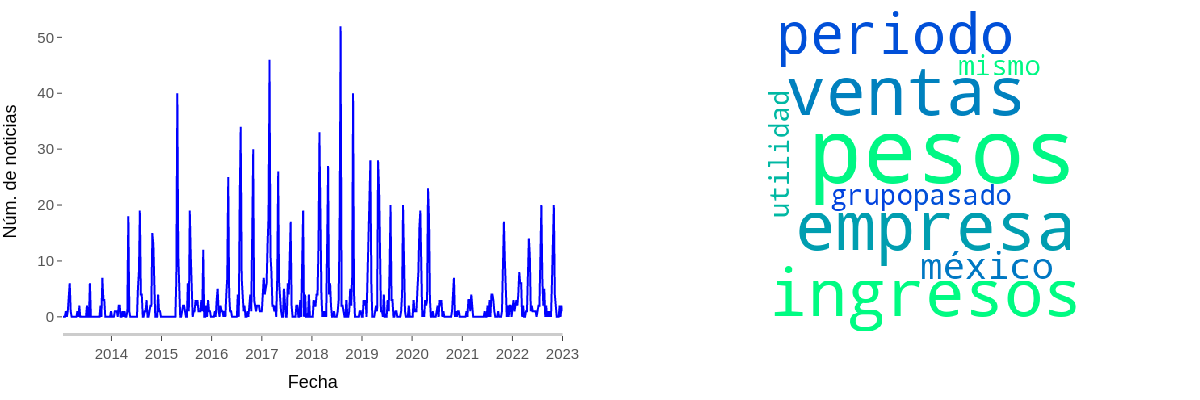

In [32]:
ax_topic = aux_topic[3].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==3)[0]].values,10)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 4',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Sentimento negativo

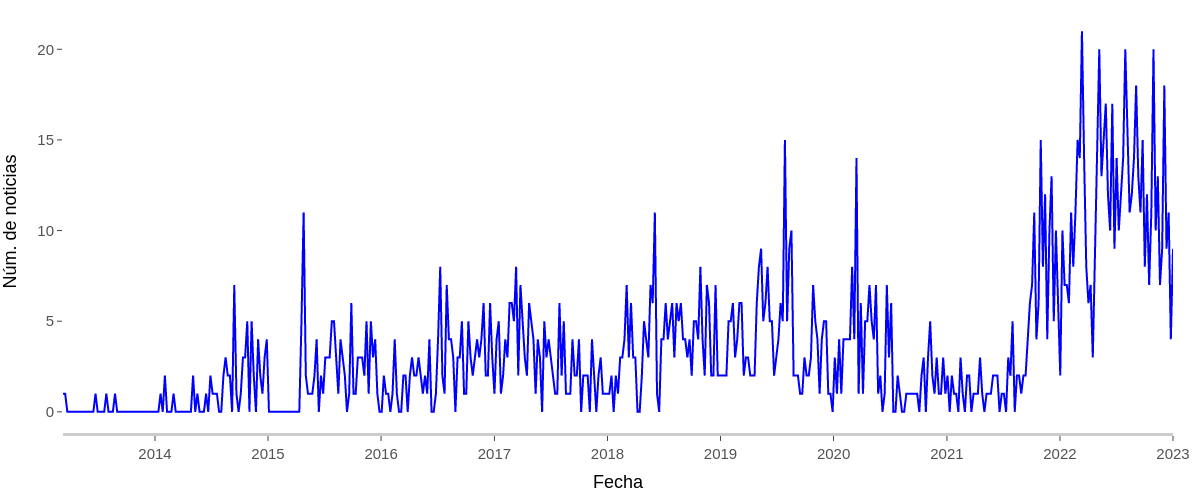

In [33]:
ax_sent = bd.Sent[(bd.Sent=='NEG')&(bd.Sent_prob>0.7)].resample('W').count()
fig = go.Figure()
fig.add_trace(go.Scatter(x = ax_sent.index,y = ax_sent.values, mode='lines',
        name='Negativo',line=dict(color='blue', width=2)))
config_fig("Núm. de noticias","Fecha")

fig.update_layout(width=1200,height=500)
fig.show(renderer="png")

### Sentimento positivo

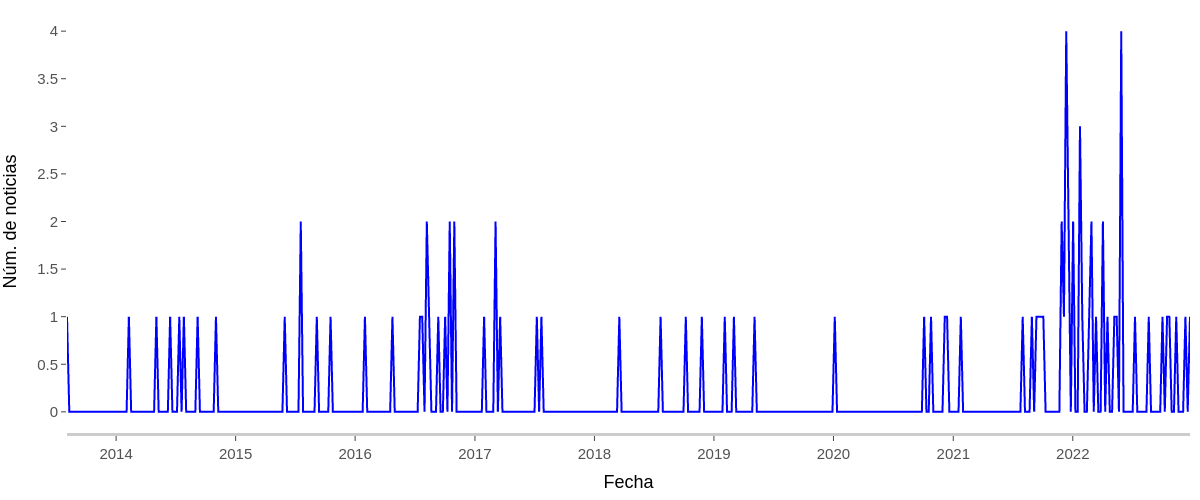

In [34]:
ax_sent = bd.Sent[(bd.Sent=='POS')&(bd.Sent_prob>0.7)].resample('W').count()
fig = go.Figure()
fig.add_trace(go.Scatter(x = ax_sent.index,y = ax_sent.values, mode='lines',
        name='Positivo',line=dict(color='blue', width=2)))
config_fig("Núm. de noticias","Fecha")
fig.update_layout(width=1200,height=500)
fig.show(renderer="png")

## Noticias de la sección de bolsas de valores

### Tópico 1

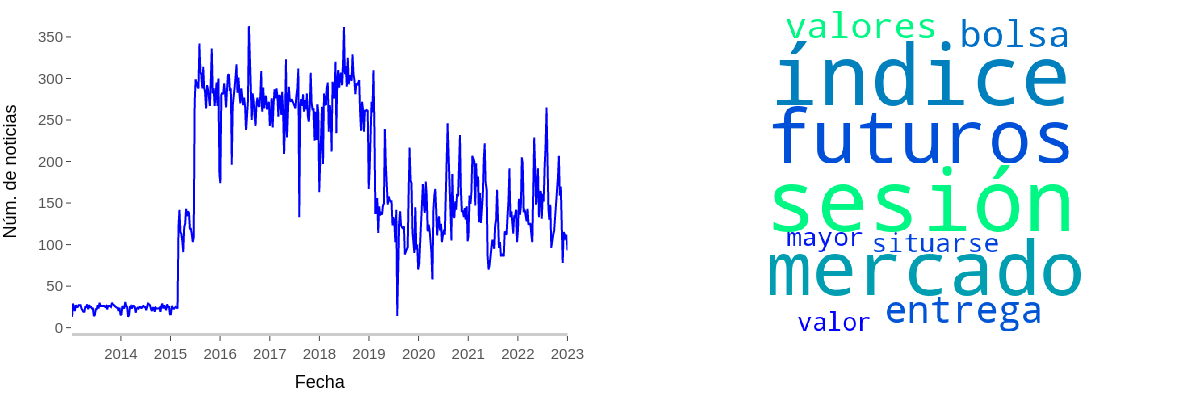

In [38]:
ax_topic = aux_topic[0].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==0)[0]].values,10)


fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 1',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Tópico 2

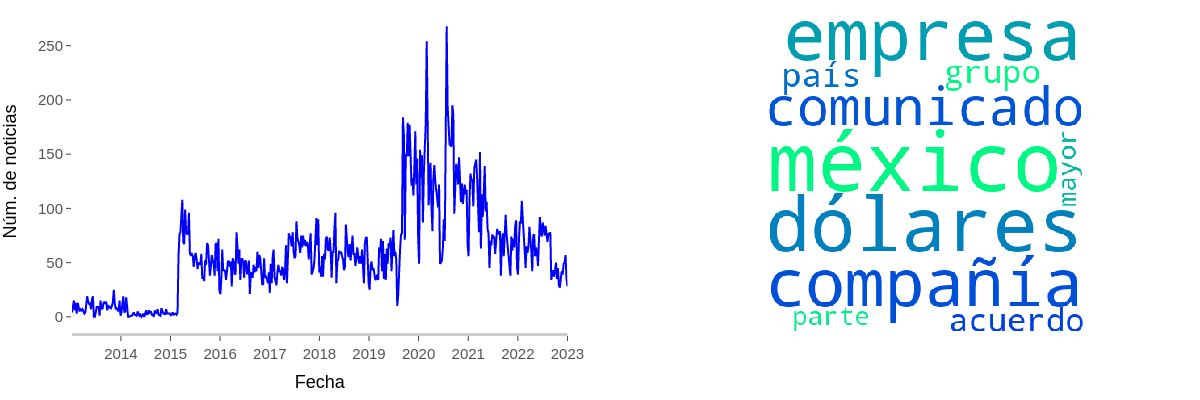

In [39]:
ax_topic = aux_topic[1].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==1)[0]].values,10)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 2',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Tópico 3

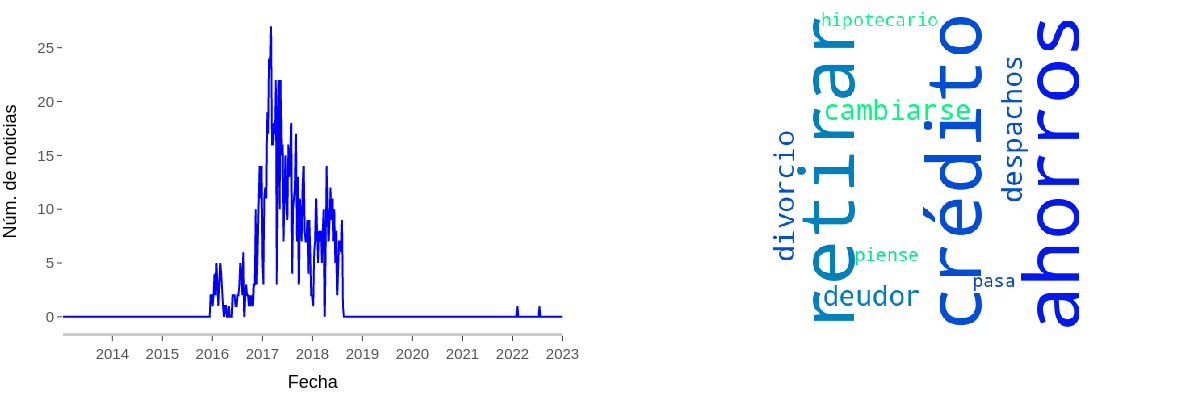

In [40]:
ax_topic = aux_topic[2].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==2)[0]].values,10)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 3',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Tópico 4

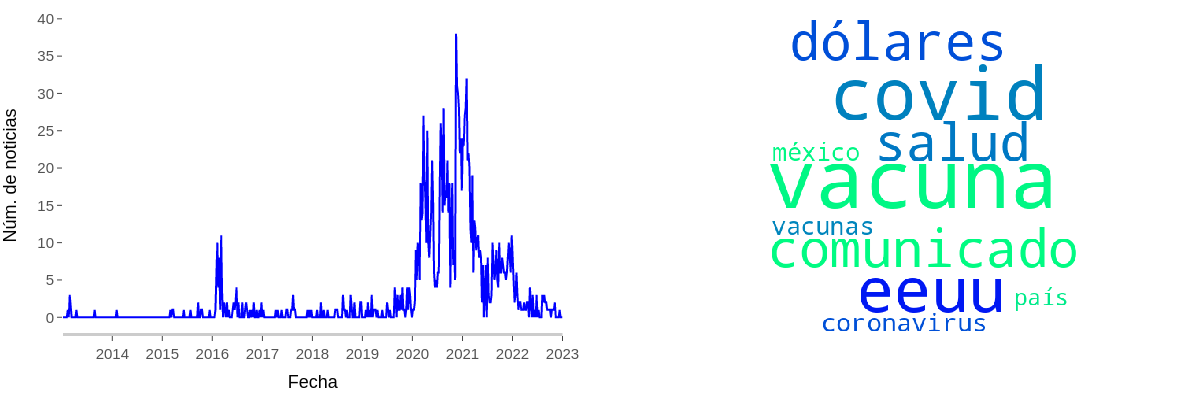

In [41]:
ax_topic = aux_topic[3].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==3)[0]].values,10)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 4',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Sentimento negativo

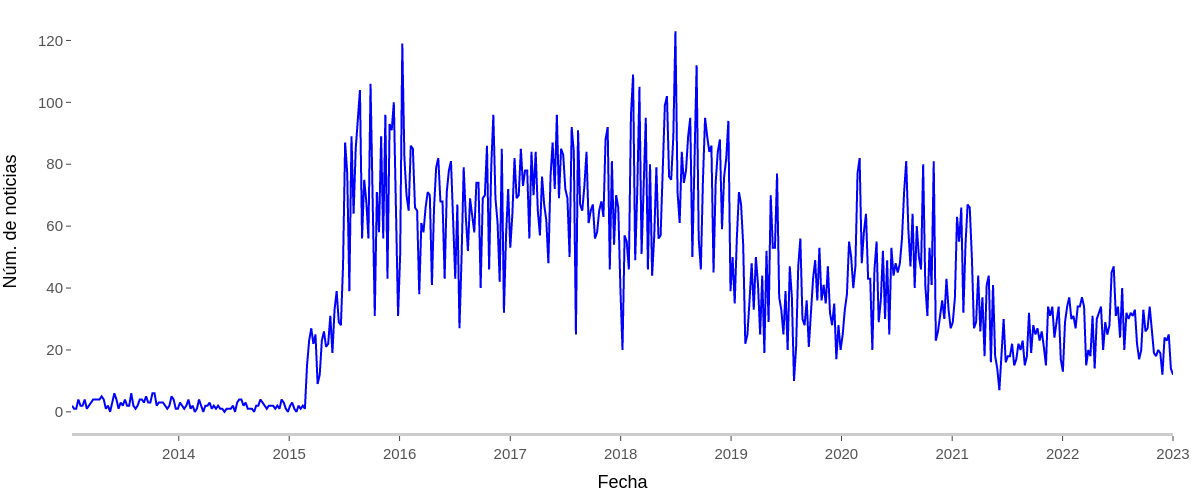

In [42]:
ax_sent = bd.Sent[(bd.Sent=='NEG')&(bd.Sent_prob>0.7)].resample('W').count()
fig = go.Figure()
fig.add_trace(go.Scatter(x = ax_sent.index,y = ax_sent.values, mode='lines',
        name='Negativo',line=dict(color='blue', width=2)))
config_fig("Núm. de noticias","Fecha")
fig.update_layout(width=1200,height=500)
fig.show(renderer="png")

### Sentimento positivo

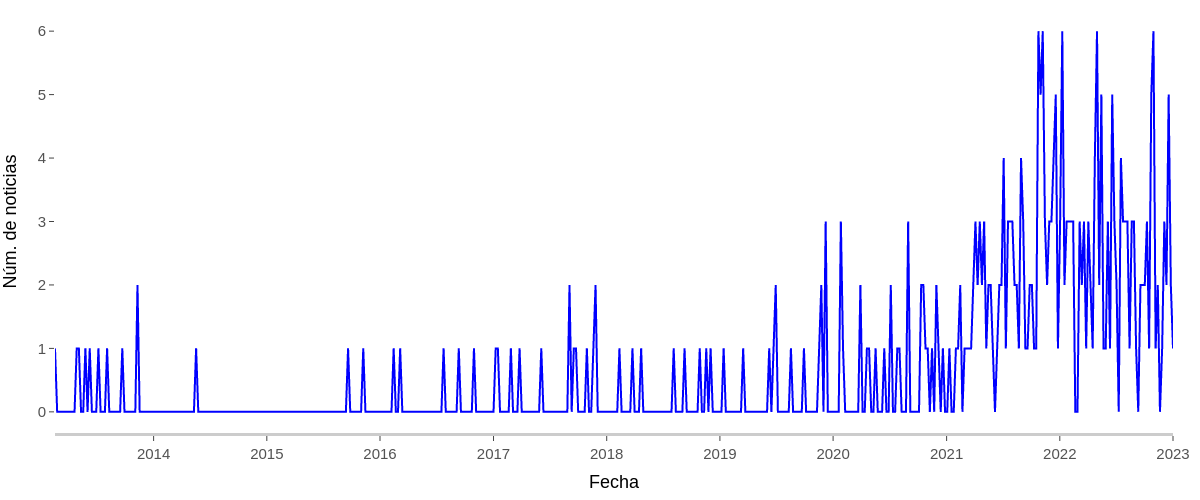

In [43]:
ax_sent = bd.Sent[(bd.Sent=='POS')&(bd.Sent_prob>0.7)].resample('W').count()
fig = go.Figure()
fig.add_trace(go.Scatter(x = ax_sent.index,y = ax_sent.values, mode='lines',
        name='Negativo',line=dict(color='blue', width=2)))
config_fig("Núm. de noticias","Fecha")
fig.update_layout(width=1200,height=500)
fig.show(renderer="png")

## Noticias de la sección de indicadores economicos

### Tópico 1

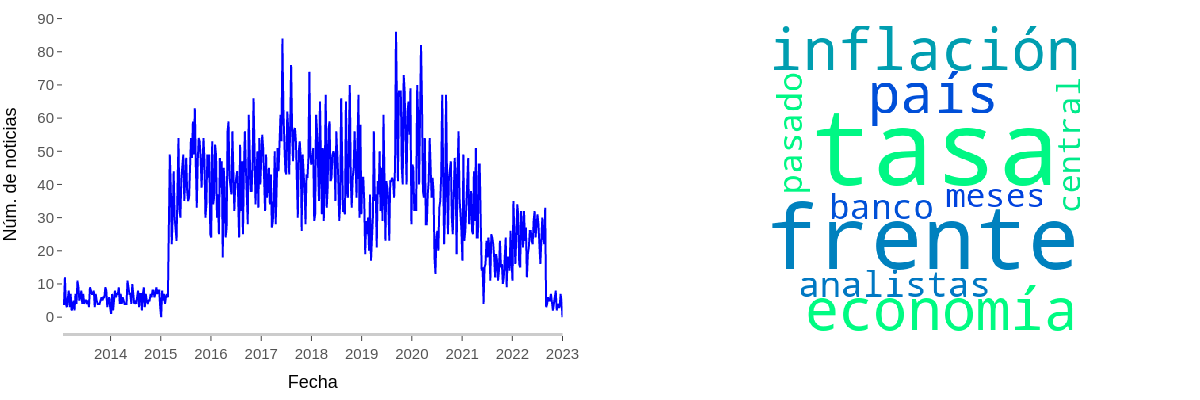

In [47]:
ax_topic = aux_topic[0].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==0)[0]].values,10)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 1',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Tópico 2

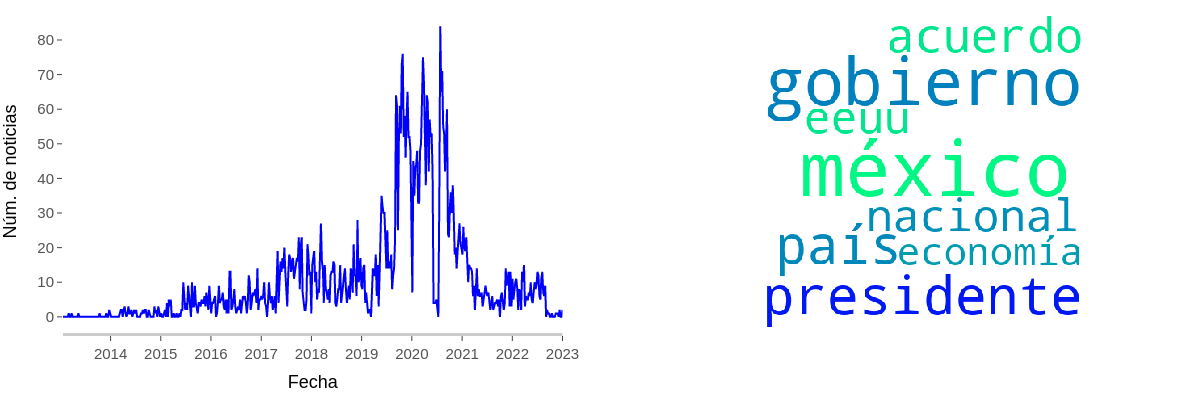

In [48]:
ax_topic = aux_topic[1].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==1)[0]].values,10)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 2',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Tópico 3

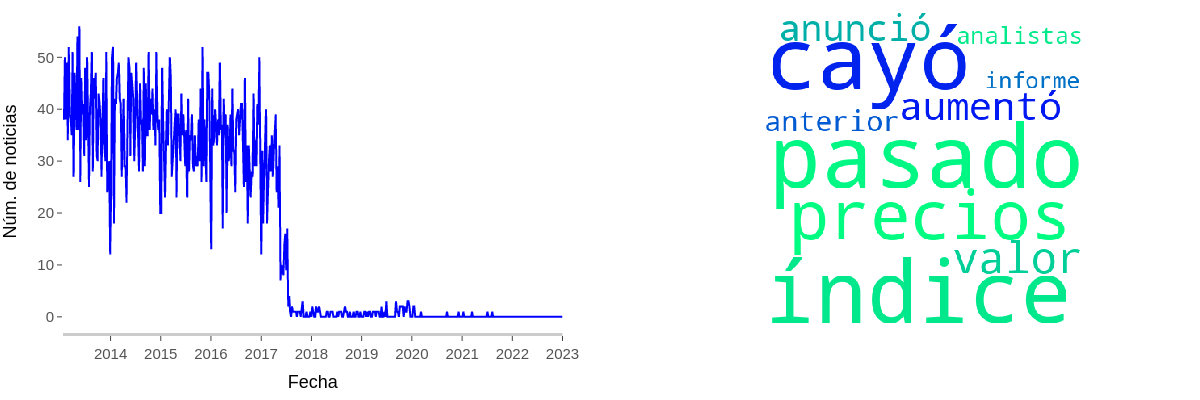

In [49]:
ax_topic = aux_topic[2].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==2)[0]].values,10)
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 3',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Tópico 4

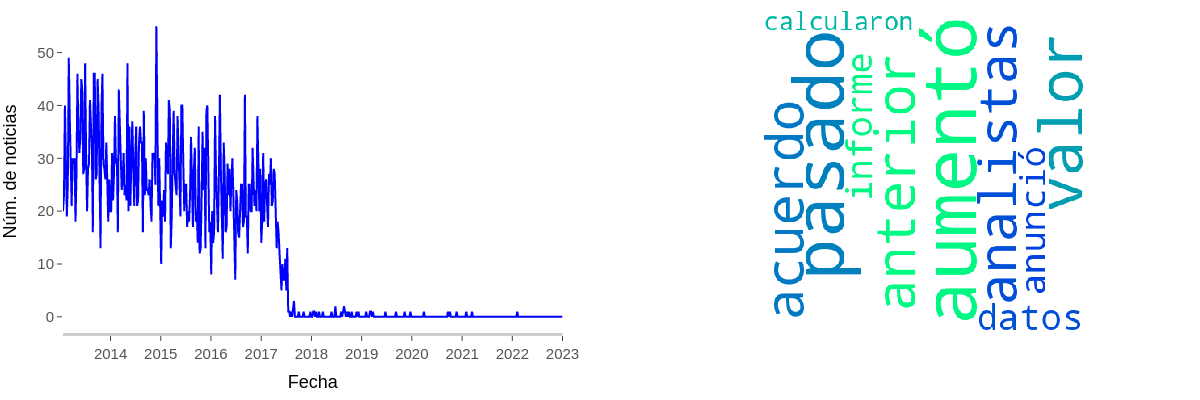

In [50]:
ax_topic = aux_topic[3].resample('W').sum()
wordcloud_image = create_wordcloud(bd['Preproceso'][np.where(bd['Topicos_mean']==3)[0]].values,10)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x = ax_topic.index,y = ax_topic.values, mode='lines',
        name='Topico 4',line=dict(color='blue', width=2)),row=1, col=1)
config_fig("Núm. de noticias","Fecha")

fig.add_trace(go.Image(z=wordcloud_image,dx=400, dy=400),row=1, col=2)
fig.update_xaxes(visible=False, fixedrange=False,row=1, col=2)
fig.update_yaxes(visible=False, fixedrange=False,row=1, col=2)
fig.show(renderer="png")

### Sentimento negativo

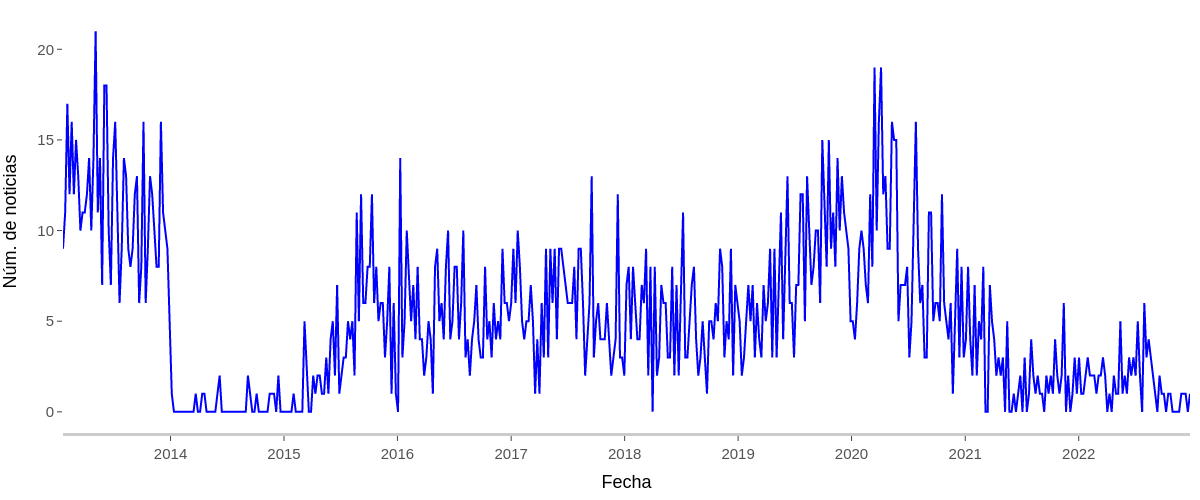

In [51]:
ax_sent = bd.Sent[(bd.Sent=='NEG')&(bd.Sent_prob>0.7)].resample('W').count()
fig = go.Figure()
fig.add_trace(go.Scatter(x = ax_sent.index,y = ax_sent.values, mode='lines',
        name='Negativo',line=dict(color='blue', width=2)))
config_fig("Núm. de noticias","Fecha")
fig.update_layout(width=1200,height=500)
fig.show(renderer="png")

### Sentimento positivo

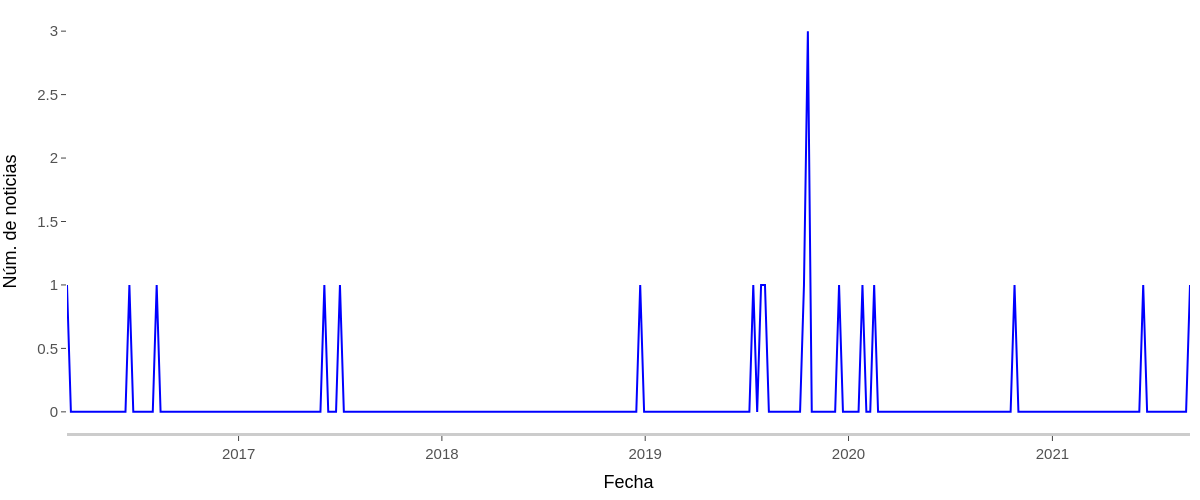

In [52]:
ax_sent = bd.Sent[(bd.Sent=='POS')&(bd.Sent_prob>0.7)].resample('W').count()
fig = go.Figure()
fig.add_trace(go.Scatter(x = ax_sent.index,y = ax_sent.values, mode='lines',
        name='Negativo',line=dict(color='blue', width=2)))
config_fig("Núm. de noticias","Fecha")
fig.update_layout(width=1200,height=500)
fig.show(renderer="png")